In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("/home/shigilsasi/code/Guvi_Projects/Axis_Bank_Intelligent_Product_&_Offer_Recommendation_System_using_Machine_Learning/output/axis_transactions.csv")
df.head()

,account_id,date,narration,channel,merchant,category,debit,credit,balance,source_file
0,0001_Thiyagarajan_Subbu_Statement,2022-12-01,UPI/973571737/LANDLORD RENT/landlord@okhdfc,UPI,LANDLORD RENT,Rent,15139.0,0.0,203044.0,0001_Thiyagarajan_Subbu_Statement.pdf
1,0001_Thiyagarajan_Subbu_Statement,2022-12-01,POS/988002/AMAZON INDIA/CARD **9369,POS,AMAZON INDIA,Shopping,3603.0,0.0,199441.0,0001_Thiyagarajan_Subbu_Statement.pdf
2,0001_Thiyagarajan_Subbu_Statement,2022-12-01,UPI/957858928/RAPIDO/rapido@ybl,UPI,RAPIDO,Transport,135.0,0.0,199306.0,0001_Thiyagarajan_Subbu_Statement.pdf
3,0001_Thiyagarajan_Subbu_Statement,2022-12-03,POS/214232/FLIPKART INDIA/CARD **9768,POS,FLIPKART INDIA,Shopping,1998.0,0.0,197308.0,0001_Thiyagarajan_Subbu_Statement.pdf
4,0001_Thiyagarajan_Subbu_Statement,2022-12-04,UPI/233699231/EATSURE/eatsure@hdfcbank,UPI,EATSURE,Other,374.0,0.0,196934.0,0001_Thiyagarajan_Subbu_Statement.pdf


In [3]:
df.columns

Index(['account_id', 'date', 'narration', 'channel', 'merchant', 'category',
       'debit', 'credit', 'balance', 'source_file'],
      dtype='object')

In [4]:
df.dtypes

account_id      object
date            object
narration       object
channel         object
merchant        object
category        object
debit          float64
credit         float64
balance        float64
source_file     object
dtype: object

In [5]:
df['merchant'].value_counts()

merchant
ZOMATO             85215
SWIGGY             84729
EATSURE            84617
OLA                56315
RAPIDO             56232
                   ...  
ACNO 9720363461        1
SIP909387              1
VL66096                1
ACNO 9087325699        1
SIP779180              1
Name: count, Length: 135880, dtype: int64

In [6]:
df['category'].unique()

array(['Rent', 'Shopping', 'Transport', 'Other', 'Food & Dining',
       'Entertainment', 'Investment', 'Utilities', 'Bank Charges',
       'ATM Cash Withdrawal', 'Salary', 'Interest Credit', 'Transfer',
       'Insurance', 'Fuel'], dtype=object)

In [7]:
df_other = df[df['category'] == 'Other']
df_other.head()

,account_id,date,narration,channel,merchant,category,debit,credit,balance,source_file
4,0001_Thiyagarajan_Subbu_Statement,2022-12-04,UPI/233699231/EATSURE/eatsure@hdfcbank,UPI,EATSURE,Other,374.0,0.0,196934.00,0001_Thiyagarajan_Subbu_Statement.pdf
5,0001_Thiyagarajan_Subbu_Statement,2022-12-04,UPI/503872733/SWIGGY/swiggy@hdfcbank,UPI,SWIGGY,Other,341.0,0.0,196593.00,0001_Thiyagarajan_Subbu_Statement.pdf
12,0001_Thiyagarajan_Subbu_Statement,2022-12-11,UPI/677898986/ZOMATO/zomato@hdfcbank,UPI,ZOMATO,Other,417.0,0.0,177592.45,0001_Thiyagarajan_Subbu_Statement.pdf
15,0001_Thiyagarajan_Subbu_Statement,2022-12-15,UPI/266011009/SPAR HYPERMARKET CBE/sparhyperma...,UPI,SPAR HYPERMARKET CBE,Other,3334.0,0.0,167370.45,0001_Thiyagarajan_Subbu_Statement.pdf
16,0001_Thiyagarajan_Subbu_Statement,2022-12-15,UPI/635472868/BOOKMYSHOW/bms@axisbank,UPI,BOOKMYSHOW,Other,573.0,0.0,166797.45,0001_Thiyagarajan_Subbu_Statement.pdf


In [8]:
df_other.sample(100)

,account_id,date,narration,channel,merchant,category,debit,credit,balance,source_file
1292584,0930_Deepak_Balaji_Statement,2024-02-27,UPI/188914066/MORE SUPERMARKET/moresupermarket...,UPI,MORE SUPERMARKET,Other,1936.0,0.0,-341009.75,0930_Deepak_Balaji_Statement.pdf
899860,0651_Fathima_Siva_Statement,2023-07-28,UPI/507018958/BOOKMYSHOW/bms@axisbank,UPI,BOOKMYSHOW,Other,510.0,0.0,340623.04,0651_Fathima_Siva_Statement.pdf
169016,0123_Karthik_Perumal_Statement,2023-06-02,ACH/DEBIT/ACT FIBERNET/ACTBB22066880,ACH,ACT FIBERNET,Other,599.0,0.0,529823.15,0123_Karthik_Perumal_Statement.pdf
851377,0613_Balaji_Venkat_Statement,2023-10-16,UPI/817579918/APOLLO PHARMACY CBE/apollopharma...,UPI,APOLLO PHARMACY CBE,Other,984.0,0.0,1641363.44,0613_Balaji_Venkat_Statement.pdf
528655,0373_Fathima_Prakash_Statement,2023-06-29,UPI/542962779/SPAR HYPERMARKET CBE/sparhyperma...,UPI,SPAR HYPERMARKET CBE,Other,2849.0,0.0,199235.61,0373_Fathima_Prakash_Statement.pdf
...,...,...,...,...,...,...,...,...,...,...
128136,0095_Anand_Prabhu_Statement,2025-01-08,UPI/933692773/SWIGGY/swiggy@hdfcbank,UPI,SWIGGY,Other,642.0,0.0,2382646.93,0095_Anand_Prabhu_Statement.pdf
796148,0570_Hari_Srinivas_Statement,2026-01-28,UPI/668400367/SWIGGY/swiggy@hdfcbank,UPI,SWIGGY,Other,479.0,0.0,1490750.88,0570_Hari_Srinivas_Statement.pdf
1009186,0730_Faisal_Sundaram_Statement,2025-07-24,UPI/946704830/EATSURE/eatsure@hdfcbank,UPI,EATSURE,Other,547.0,0.0,-1380299.86,0730_Faisal_Sundaram_Statement.pdf
584274,0413_Iyappan_Raman_Statement,2023-09-15,UPI/292242553/EATSURE/eatsure@hdfcbank,UPI,EATSURE,Other,561.0,0.0,371115.90,0413_Iyappan_Raman_Statement.pdf


In [9]:
df_other['merchant'].value_counts()

merchant
ZOMATO                85215
SWIGGY                84729
EATSURE               84617
ACT FIBERNET          23412
RELIANCE FRESH CBE    17077
                      ...  
LN68991                   1
LN89667                   1
LN29412                   1
LN76328                   1
LN11866                   1
Name: count, Length: 19215, dtype: int64

In [10]:
FOOD_MERCHANTS = [
    "zomato", "swiggy", "eatsure", "restaurant", "hotel",
    "biryani", "mess", "annandhaas", "annapoorna"
]

GROCERY_MERCHANTS = [
    "reliance fresh", "spar", "pazhamudir", "nilgiris",
    "supermarket", "hypermarket"
]

TRANSPORT_MERCHANTS = ["ola", "uber", "rapido"]


In [11]:
def recategorize_other(row):
    text = f"{row['merchant']} {row['narration']}".lower()

    # Food & Dining
    if any(m in text for m in FOOD_MERCHANTS):
        return "Food & Dining"

    # Groceries
    if any(m in text for m in GROCERY_MERCHANTS):
        return "Groceries"

    # Transport
    if any(m in text for m in TRANSPORT_MERCHANTS):
        return "Transport"

    # Utilities
    if any(x in text for x in ["electricity", "water", "gas", "tangedco", "billpay"]):
        return "Utilities"

    # Rent
    if "rent" in text or "landlord" in text:
        return "Rent"

    # Investment
    if "sip" in text or "mutual fund" in text:
        return "Investment"

    # Bank Charges
    if "charge" in text or "sms alert" in text:
        return "Bank Charges"

    # Interest
    if "interest" in text or "int/credit" in text:
        return "Interest Credit"

    # Transfers
    if any(x in text for x in ["upi", "neft", "imps", "rtgs"]):
        return "Transfer"

    return "Unknown Merchant"


In [12]:
mask = df['category'] == 'Other'
df.loc[mask, 'category'] = df[mask].apply(recategorize_other, axis=1)
df['category'].value_counts()

category
Food & Dining          290831
Shopping               189742
Transport              168756
ATM Cash Withdrawal    135264
Unknown Merchant       106302
Groceries              101670
Transfer                99452
Utilities               70852
Fuel                    58628
Bank Charges            45408
Investment              34584
Salary                  33807
Rent                    17383
Entertainment           16852
Interest Credit         11245
Insurance                3259
Name: count, dtype: int64

In [13]:
import re

def normalize_merchant(row):
    text = row['narration'].lower()
    merchant = row['merchant']

    # Electricity
    if "tangedco" in text:
        return "TANGEDCO"

    # SIP / Mutual Fund
    if text.startswith("sip") or "mutual fund" in text:
        return "AXIS MUTUAL FUND"

    # ATM
    if row['category'] == "ATM Cash Withdrawal":
        return "ATM Withdrawal"

    # Bank Charges
    if row['category'] == "Bank Charges":
        return "Axis Bank"

    # Interest
    if row['category'] == "Interest Credit":
        return "Axis Bank"

    # Transfers
    if row['category'] == "Transfer":
        return "Personal Transfer"

    # Remove ACNO / numeric junk
    if re.search(r'acno|\d{6,}', merchant.lower()):
        return "Utility / Reference"

    return merchant.title()


In [14]:
df['clean_merchant'] = df.apply(normalize_merchant, axis=1)

In [15]:
df['merchant'] = df['clean_merchant']
df.drop(columns=['clean_merchant'], inplace=True)

In [16]:
def normalize_system_transactions(row):
    text = row['narration'].lower()

    # Credit Card Bill Payment
    if "axis credit card" in text:
        row['category'] = "Credit Card Payment"
        row['merchant'] = "Axis Credit Card"
        return row

    # Home Loan EMI
    if text.startswith("emi") and "home loan" in text:
        row['category'] = "Loan EMI"
        row['merchant'] = "Axis Home Loan"
        return row

    # Car Loan EMI
    if text.startswith("emi") and "car loan" in text:
        row['category'] = "Loan EMI"
        row['merchant'] = "Axis Car Loan"
        return row

    return row


In [17]:
df = df.apply(normalize_system_transactions, axis=1)

In [18]:
def normalize_emi_transactions(row):
    text = str(row['narration']).lower()
    merchant = str(row['merchant']).upper()

    if text.startswith("emi"):
        row['category'] = "Loan EMI"

        if merchant.startswith("PL"):
            row['merchant'] = "Axis Personal Loan"

        elif merchant.startswith("VL"):
            row['merchant'] = "Axis Vehicle Loan"

        elif merchant.startswith("LN"):
            row['merchant'] = "Axis Home Loan"

        else:
            row['merchant'] = "Axis Loan"

    return row

In [19]:
df = df.apply(normalize_emi_transactions, axis=1)

In [20]:
import re

def normalize_salary_transactions(row):
    text = str(row['narration']).upper()

    if row['category'] == "Salary" and "SALARY" in text:
        # Extract employer name between NEFT-xxxx- and -SALARY
        match = re.search(r'NEFT-\d+-(.*?)-SALARY', text)
        if match:
            employer = match.group(1).title()
            row['merchant'] = employer
        else:
            row['merchant'] = "Employer"

    return row


In [21]:
df = df.apply(normalize_salary_transactions, axis=1)

In [22]:
df['merchant'].value_counts()

merchant
ATM Withdrawal         135264
Personal Transfer       99452
Zomato                  85215
Swiggy                  84729
Eatsure                 84617
                        ...  
Tcs India Pvt Ltd         651
Infosys Limited           608
Suguna Foods              597
Coimbatore Textiles       559
Mindtree Ltd              513
Name: count, Length: 86, dtype: int64

In [23]:
df['category'].value_counts()   

category
Food & Dining          290831
Shopping               189742
Transport              168756
ATM Cash Withdrawal    135264
Groceries              101670
Transfer                99452
Unknown Merchant        86181
Fuel                    58628
Utilities               50637
Bank Charges            45408
Investment              34584
Salary                  33807
Credit Card Payment     20215
Loan EMI                20121
Rent                    17383
Entertainment           16852
Interest Credit         11245
Insurance                3259
Name: count, dtype: int64

In [24]:
df.head()

,account_id,date,narration,channel,merchant,category,debit,credit,balance,source_file
0,0001_Thiyagarajan_Subbu_Statement,2022-12-01,UPI/973571737/LANDLORD RENT/landlord@okhdfc,UPI,Landlord Rent,Rent,15139.0,0.0,203044.0,0001_Thiyagarajan_Subbu_Statement.pdf
1,0001_Thiyagarajan_Subbu_Statement,2022-12-01,POS/988002/AMAZON INDIA/CARD **9369,POS,Amazon India,Shopping,3603.0,0.0,199441.0,0001_Thiyagarajan_Subbu_Statement.pdf
2,0001_Thiyagarajan_Subbu_Statement,2022-12-01,UPI/957858928/RAPIDO/rapido@ybl,UPI,Rapido,Transport,135.0,0.0,199306.0,0001_Thiyagarajan_Subbu_Statement.pdf
3,0001_Thiyagarajan_Subbu_Statement,2022-12-03,POS/214232/FLIPKART INDIA/CARD **9768,POS,Flipkart India,Shopping,1998.0,0.0,197308.0,0001_Thiyagarajan_Subbu_Statement.pdf
4,0001_Thiyagarajan_Subbu_Statement,2022-12-04,UPI/233699231/EATSURE/eatsure@hdfcbank,UPI,Eatsure,Food & Dining,374.0,0.0,196934.0,0001_Thiyagarajan_Subbu_Statement.pdf


In [25]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df_model = df.drop(columns=[
    'source_file',
    'narration',
    'date',
    'balance'
],errors = 'ignore')

In [26]:
CATEGORY_LIST = [
    "Food & Dining",
    "Shopping",
    "Transport",
    "Rent",
    "Loan EMI",
    "Utilities"
]

for cat in CATEGORY_LIST:
    col_name = cat.lower().replace(" ", "_").replace("&", "and") + "_spend"
    df_model[col_name] = df_model['debit'].where(df_model['category'] == cat, 0)


In [27]:
user_features = (
    df_model
    .groupby('account_id')
    .agg(
        total_debit=('debit', 'sum'),
        total_credit=('credit', 'sum'),
        total_transactions=('account_id', 'count'),

        food_spend=('food_and_dining_spend', 'sum'),
        shopping_spend=('shopping_spend', 'sum'),
        transport_spend=('transport_spend', 'sum'),
        rent_spend=('rent_spend', 'sum'),
        emi_spend=('loan_emi_spend', 'sum'),
        utility_spend=('utilities_spend', 'sum'),

        upi_txn=('channel', lambda x: (x == 'UPI').sum()),
        pos_txn=('channel', lambda x: (x == 'POS').sum()),
        neft_txn=('channel', lambda x: (x == 'NEFT').sum()),

        top_merchant=('merchant', lambda x: x.value_counts().idxmax())
    )
    .reset_index()
)


In [28]:
# Derived Behavorial Ratios

user_features['savings_ratio'] = (
    user_features['total_credit'] /
    (user_features['total_debit'] + 1)
)

user_features['emi_ratio'] = (
    user_features['emi_spend'] /
    (user_features['total_credit'] + 1)
)

user_features['food_ratio'] = (
    user_features['food_spend'] /
    (user_features['total_debit'] + 1)
)

user_features['digital_ratio'] = (
    (user_features['upi_txn'] + user_features['pos_txn']) /
    (user_features['total_transactions'] + 1)
)


In [29]:
print(user_features.shape)
user_features.head()

(1000, 18)


,account_id,total_debit,total_credit,total_transactions,food_spend,shopping_spend,transport_spend,rent_spend,emi_spend,utility_spend,upi_txn,pos_txn,neft_txn,top_merchant,savings_ratio,emi_ratio,food_ratio,digital_ratio
0,0001_Thiyagarajan_Subbu_Statement,4732053.13,4541729.76,1711,219553.0,1017929.0,42917.0,630002.0,0.0,100049.0,870,449,61,ATM Withdrawal,0.959780,0.000000,0.046397,0.770444
1,0002_Aarti_Selvam_Statement,970874.74,961789.01,499,58525.0,263085.0,13628.0,0.0,0.0,28396.0,239,132,23,ATM Withdrawal,0.990641,0.000000,0.060281,0.742000
2,0003_Radha_Krishnan_Statement,1978346.61,1953447.39,664,92397.0,458422.0,18398.0,393988.0,225120.0,43075.0,350,175,22,ATM Withdrawal,0.987414,0.115242,0.046704,0.789474
3,0004_Loganathan_Surya_Statement,2146990.98,3025475.44,960,66430.0,148909.0,36882.0,635993.0,0.0,51404.0,475,219,44,ATM Withdrawal,1.409169,0.000000,0.030941,0.722164
4,0005_Meena_Balaji_Statement,4934117.48,3925762.77,1863,246707.0,1426179.0,47303.0,608564.0,101280.0,111455.0,924,505,69,ATM Withdrawal,0.795636,0.025799,0.050000,0.766631


In [30]:
user_features.shape

(1000, 18)

In [31]:
user_features.to_csv("user_features", index=False)

In [46]:
df = pd.read_csv("/home/shigilsasi/code/Guvi_Projects/Axis_Bank_Intelligent_Product_&_Offer_Recommendation_System_using_Machine_Learning/user_features")
df.head()

,account_id,total_debit,total_credit,total_transactions,food_spend,shopping_spend,transport_spend,rent_spend,emi_spend,utility_spend,upi_txn,pos_txn,neft_txn,top_merchant,savings_ratio,emi_ratio,food_ratio,digital_ratio
0,0001_Thiyagarajan_Subbu_Statement,4732053.13,4541729.76,1711,219553.0,1017929.0,42917.0,630002.0,0.0,100049.0,870,449,61,ATM Withdrawal,0.959780,0.000000,0.046397,0.770444
1,0002_Aarti_Selvam_Statement,970874.74,961789.01,499,58525.0,263085.0,13628.0,0.0,0.0,28396.0,239,132,23,ATM Withdrawal,0.990641,0.000000,0.060281,0.742000
2,0003_Radha_Krishnan_Statement,1978346.61,1953447.39,664,92397.0,458422.0,18398.0,393988.0,225120.0,43075.0,350,175,22,ATM Withdrawal,0.987414,0.115242,0.046704,0.789474
3,0004_Loganathan_Surya_Statement,2146990.98,3025475.44,960,66430.0,148909.0,36882.0,635993.0,0.0,51404.0,475,219,44,ATM Withdrawal,1.409169,0.000000,0.030941,0.722164
4,0005_Meena_Balaji_Statement,4934117.48,3925762.77,1863,246707.0,1426179.0,47303.0,608564.0,101280.0,111455.0,924,505,69,ATM Withdrawal,0.795636,0.025799,0.050000,0.766631


In [47]:
df.columns

Index(['account_id', 'total_debit', 'total_credit', 'total_transactions',
       'food_spend', 'shopping_spend', 'transport_spend', 'rent_spend',
       'emi_spend', 'utility_spend', 'upi_txn', 'pos_txn', 'neft_txn',
       'top_merchant', 'savings_ratio', 'emi_ratio', 'food_ratio',
       'digital_ratio'],
      dtype='object')

In [48]:
df.describe()

,total_debit,total_credit,total_transactions,food_spend,shopping_spend,transport_spend,rent_spend,emi_spend,utility_spend,upi_txn,pos_txn,neft_txn,savings_ratio,emi_ratio,food_ratio,digital_ratio
count,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.085903e+06,6.044653e+06,1384.035000,151964.348000,6.005147e+05,40553.445000,6.113803e+05,4.401812e+05,72104.451000,677.357000,347.409000,65.936000,1.498601,0.068050,0.040486,0.738040
std,2.621840e+06,4.772740e+06,668.592635,83563.262167,4.225718e+05,19429.749467,9.249773e+05,7.458837e+05,37551.924872,330.321507,174.921145,36.380234,0.660242,0.078546,0.012762,0.029244
min,3.190520e+05,3.737456e+05,209.000000,12436.000000,2.341000e+04,4403.000000,0.000000e+00,0.000000e+00,6923.000000,97.000000,47.000000,7.000000,0.428873,0.000000,0.011230,0.644550
25%,2.163497e+06,2.775885e+06,823.500000,84917.000000,2.719998e+05,23384.000000,0.000000e+00,0.000000e+00,41251.500000,398.500000,209.000000,36.750000,1.015470,0.000000,0.030912,0.717800
50%,3.614331e+06,4.667818e+06,1385.500000,142667.000000,4.910020e+05,40385.000000,1.282890e+05,1.035600e+05,69699.000000,678.500000,343.500000,63.000000,1.350133,0.037290,0.040725,0.739589
75%,5.340030e+06,7.832884e+06,1902.000000,206129.500000,8.407212e+05,57232.750000,9.041862e+05,5.526835e+05,98816.500000,936.000000,475.000000,86.000000,1.830344,0.130147,0.049974,0.759773
max,1.909144e+07,3.139716e+07,2927.000000,397439.000000,2.053038e+06,80568.000000,5.923213e+06,6.026551e+06,170650.000000,1462.000000,838.000000,162.000000,5.785202,0.311819,0.085813,0.808824


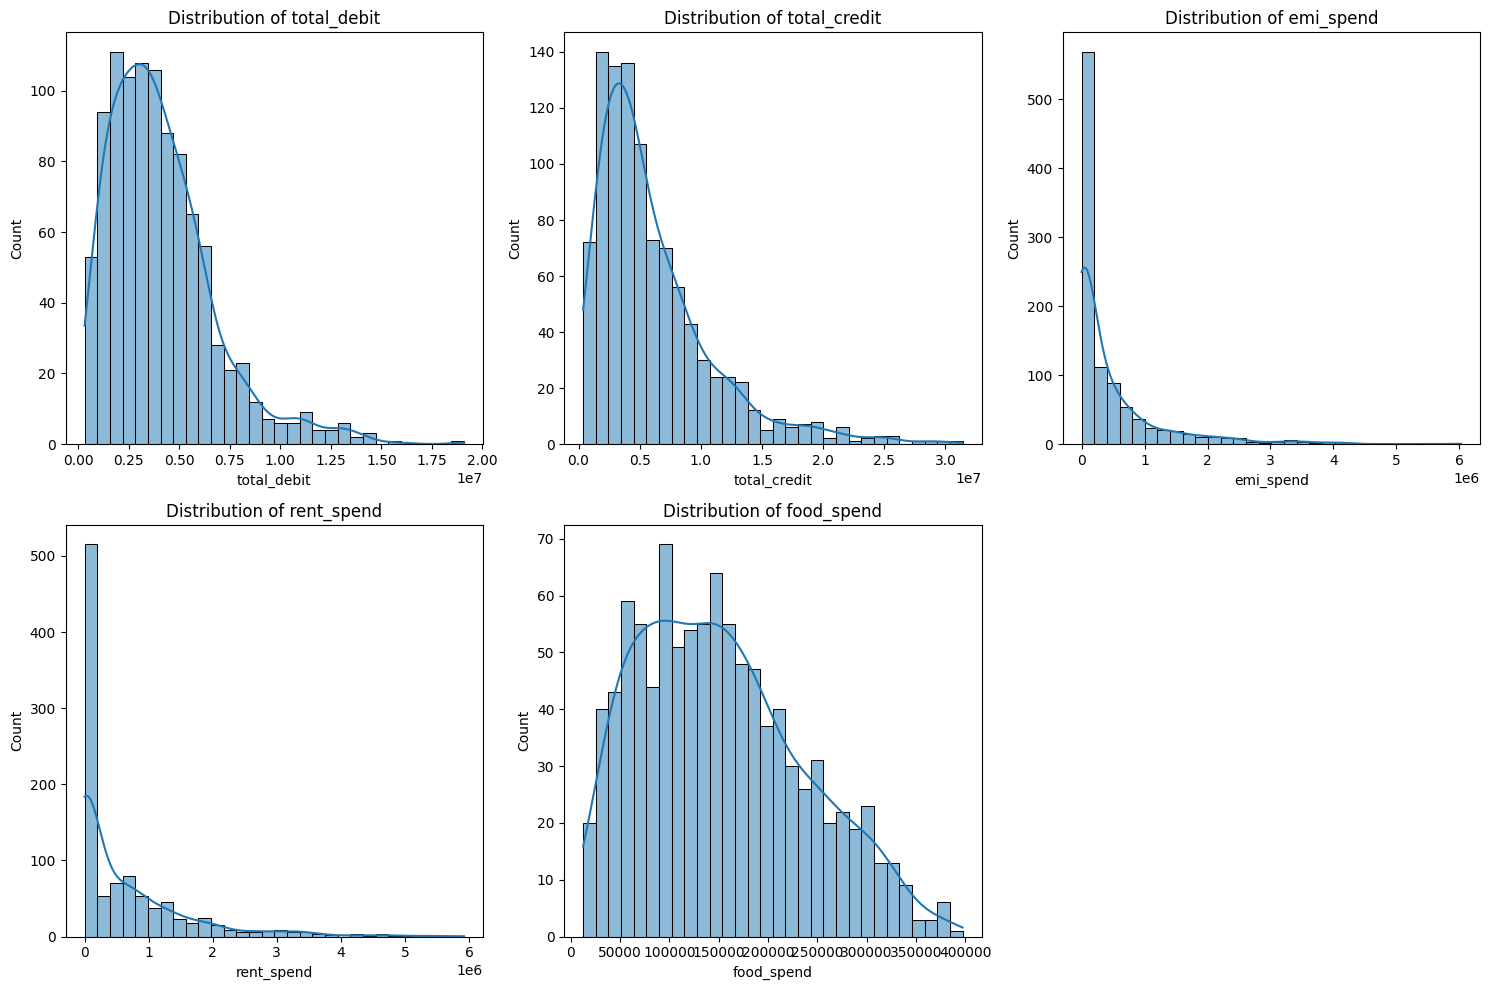

In [49]:
num_cols = [
    'total_debit',
    'total_credit',
    'emi_spend',
    'rent_spend',
    'food_spend'
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


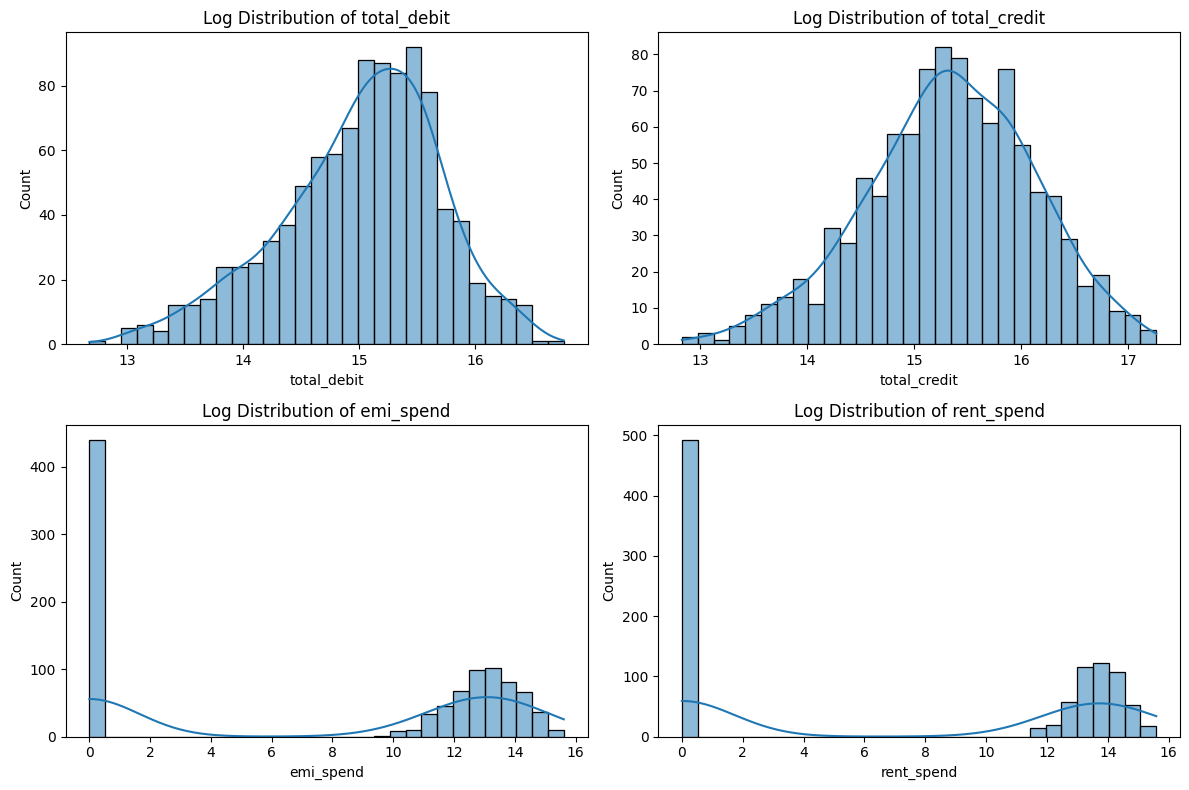

In [50]:
log_cols = ['total_debit', 'total_credit', 'emi_spend', 'rent_spend']

df_log = df.copy()
for col in log_cols:
    df_log[col] = np.log1p(df_log[col])

plt.figure(figsize=(12, 8))
for i, col in enumerate(log_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_log[col], bins=30, kde=True)
    plt.title(f"Log Distribution of {col}")

plt.tight_layout()
plt.show()


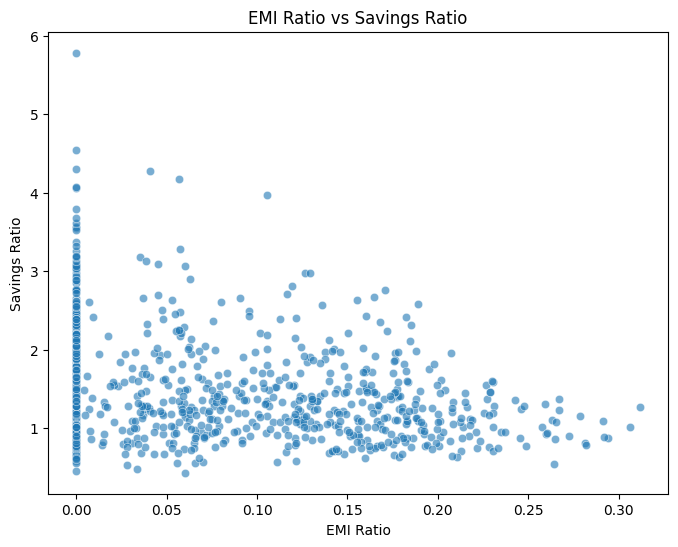

In [51]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='emi_ratio',
    y='savings_ratio',
    alpha=0.6
)
plt.title("EMI Ratio vs Savings Ratio")
plt.xlabel("EMI Ratio")
plt.ylabel("Savings Ratio")
plt.show()


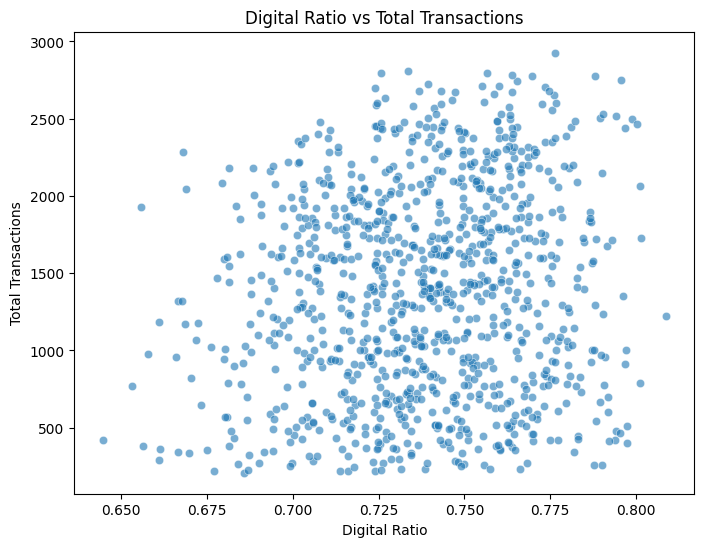

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='digital_ratio',
    y='total_transactions',
    alpha=0.6
)
plt.title("Digital Ratio vs Total Transactions")
plt.xlabel("Digital Ratio")
plt.ylabel("Total Transactions")
plt.show()


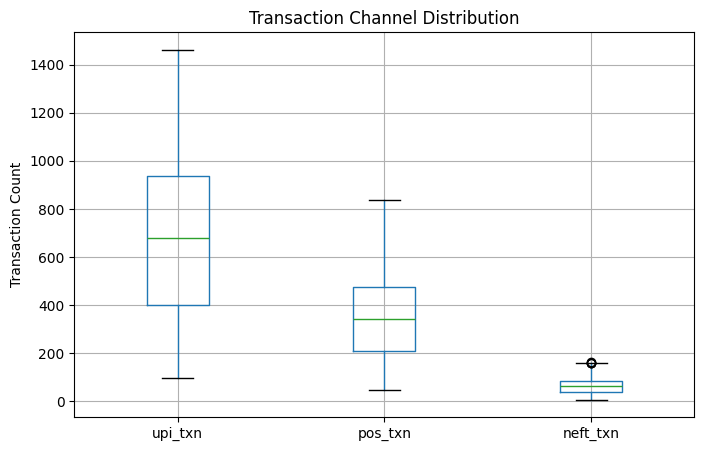

In [53]:
channel_cols = ['upi_txn', 'pos_txn', 'neft_txn']

df[channel_cols].boxplot(figsize=(8, 5))
plt.title("Transaction Channel Distribution")
plt.ylabel("Transaction Count")
plt.show()


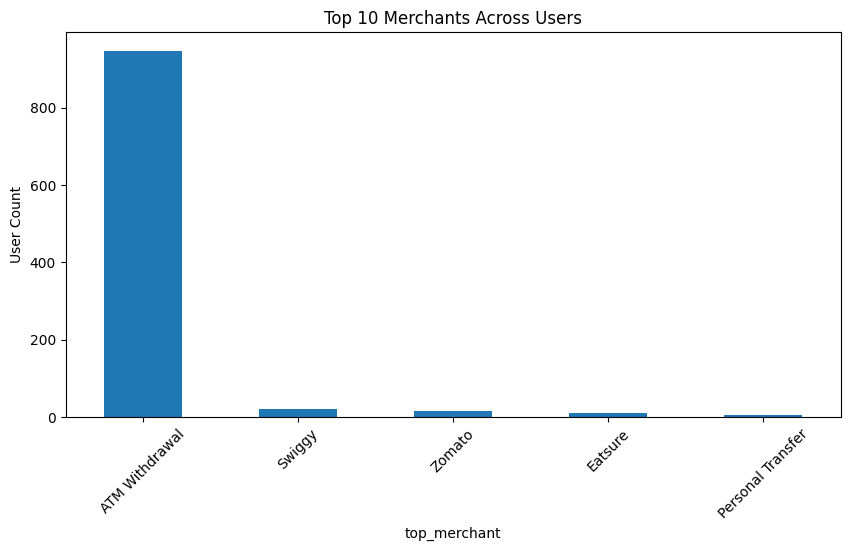

In [54]:
top_merchants = df['top_merchant'].value_counts().head(10)

plt.figure(figsize=(10, 5))
top_merchants.plot(kind='bar')
plt.title("Top 10 Merchants Across Users")
plt.ylabel("User Count")
plt.xticks(rotation=45)
plt.show()


In [55]:
df.head()

,account_id,total_debit,total_credit,total_transactions,food_spend,shopping_spend,transport_spend,rent_spend,emi_spend,utility_spend,upi_txn,pos_txn,neft_txn,top_merchant,savings_ratio,emi_ratio,food_ratio,digital_ratio
0,0001_Thiyagarajan_Subbu_Statement,4732053.13,4541729.76,1711,219553.0,1017929.0,42917.0,630002.0,0.0,100049.0,870,449,61,ATM Withdrawal,0.959780,0.000000,0.046397,0.770444
1,0002_Aarti_Selvam_Statement,970874.74,961789.01,499,58525.0,263085.0,13628.0,0.0,0.0,28396.0,239,132,23,ATM Withdrawal,0.990641,0.000000,0.060281,0.742000
2,0003_Radha_Krishnan_Statement,1978346.61,1953447.39,664,92397.0,458422.0,18398.0,393988.0,225120.0,43075.0,350,175,22,ATM Withdrawal,0.987414,0.115242,0.046704,0.789474
3,0004_Loganathan_Surya_Statement,2146990.98,3025475.44,960,66430.0,148909.0,36882.0,635993.0,0.0,51404.0,475,219,44,ATM Withdrawal,1.409169,0.000000,0.030941,0.722164
4,0005_Meena_Balaji_Statement,4934117.48,3925762.77,1863,246707.0,1426179.0,47303.0,608564.0,101280.0,111455.0,924,505,69,ATM Withdrawal,0.795636,0.025799,0.050000,0.766631


In [56]:
df.columns

Index(['account_id', 'total_debit', 'total_credit', 'total_transactions',
       'food_spend', 'shopping_spend', 'transport_spend', 'rent_spend',
       'emi_spend', 'utility_spend', 'upi_txn', 'pos_txn', 'neft_txn',
       'top_merchant', 'savings_ratio', 'emi_ratio', 'food_ratio',
       'digital_ratio'],
      dtype='object')

In [60]:
df.isnull().sum()

account_id            0
total_debit           0
total_credit          0
total_transactions    0
food_spend            0
shopping_spend        0
transport_spend       0
rent_spend            0
emi_spend             0
utility_spend         0
upi_txn               0
pos_txn               0
neft_txn              0
top_merchant          0
savings_ratio         0
emi_ratio             0
food_ratio            0
digital_ratio         0
dtype: int64

In [61]:
spend_cols = ['food_spend', 'shopping_spend', 'transport_spend', 'rent_spend', 'emi_spend', 'utility_spend']

df[spend_cols] = df[spend_cols].fillna(0)

df = df[df['total_transactions'] > 0].reset_index(drop=True)

In [62]:
features = [
    'total_debit', 'total_credit', 'total_transactions',
    'food_spend', 'shopping_spend', 'transport_spend',
    'rent_spend', 'emi_spend', 'utility_spend',
    'upi_txn', 'pos_txn', 'neft_txn',
    'savings_ratio', 'emi_ratio', 'food_ratio', 'digital_ratio'
]

X = df[features]

In [63]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

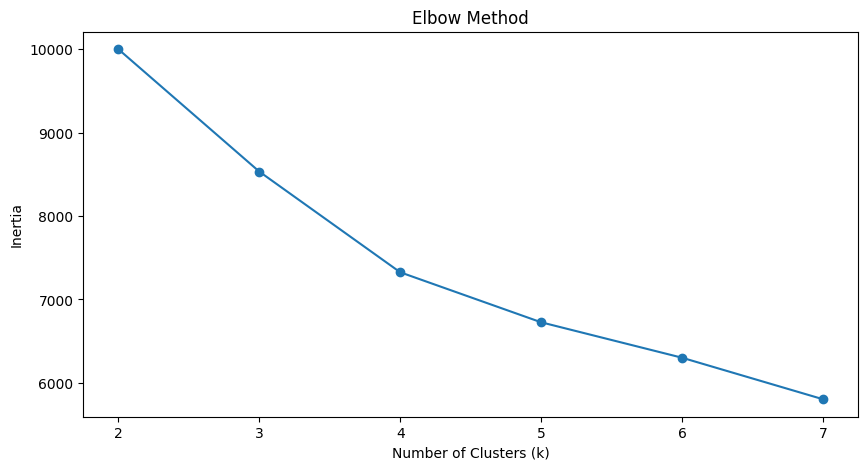

In [65]:
inertia = []
silhouette_scores = []
k_range = range(2, 8)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [66]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

df['cluster'] = kmeans.fit_predict(X_scaled)    

In [68]:
cluster_profile = df.groupby('cluster')[features].mean().round(2)
cluster_profile

,total_debit,total_credit,total_transactions,food_spend,shopping_spend,transport_spend,rent_spend,emi_spend,utility_spend,upi_txn,pos_txn,neft_txn,savings_ratio,emi_ratio,food_ratio,digital_ratio
cluster,,,,,,,,,,,,,,,,
0,10039037.42,16852459.96,2068.04,224049.66,880905.23,59475.87,2410881.61,2072073.52,106673.17,1003.67,515.05,97.17,1.71,0.14,0.02,0.73
1,1910410.52,3072242.54,682.25,72083.57,276931.33,20301.06,260663.80,184441.85,34192.42,331.99,170.26,32.84,1.60,0.06,0.04,0.73
2,5864911.31,7082358.57,2265.48,276973.68,1222393.43,63061.94,600301.82,326179.17,125822.56,1122.30,590.61,105.49,1.22,0.05,0.05,0.76
3,4175787.70,6212138.94,1550.47,160631.32,584017.87,46918.55,574318.60,390015.70,78773.13,756.37,380.84,74.97,1.47,0.07,0.04,0.73


In [69]:
cluster_name_map = {
    0: "Affluent Borrowers",
    1: "Conservative Savers",
    2: "Digital Lifestyle Spenders",
    3: "Stable Mass Market"
}

df['cluster_name'] = df['cluster'].map(cluster_name_map)

On What Basis Were the Clusters Named?

The cluster names are not random.
They are based on 3 layers of evidence:

 - Financial capacity (credit vs debit)
 - Behavioral ratios (EMI, food, savings, digital)
 - Transaction & spend intensity

Cluster 0 → Affluent Borrowers
Evidence from your table:

 - Highest total_credit & total_debit

 - Very high emi_spend (₹2M+)

 - Highest emi_ratio = 0.14

 - High rent_spend

 - High savings_ratio = 1.71

 - Strong digital_ratio = 0.73

Interpretation:

These customers earn and spend a lot, carry large EMIs, but still save well.

Why this name fits:

 - Affluent → high income & cash flow

 - Borrowers → highest EMI exposure

Name justified by both absolute values and ratios.

Cluster 1 → Conservative Savers
Evidence:

 - Lowest debit, credit, transactions

 - Lowest EMI spend & EMI ratio (0.06)

 - Strong savings_ratio = 1.60

 - Low lifestyle spending

Interpretation:

Financially careful customers who avoid debt and spend minimally.

Why this name fits:

 - Conservative → low risk-taking, low borrowing

 - Savers → high savings relative to spending


 Cluster 1 → Conservative Savers
Evidence:

 - owest debit, credit, transactions

 - Lowest EMI spend & EMI ratio (0.06)

 - Strong savings_ratio = 1.60

 - Low lifestyle spending

Interpretation:

Financially careful customers who avoid debt and spend minimally.

Why this name fits:

 - Conservative → low risk-taking, low borrowing

 - Savers → high savings relative to spending


 Cluster 3 → Stable Mass Market
Evidence:

 - Mid-range debit, credit, transactions

 - Moderate EMI ratio (0.07)

 - Balanced category spends

 - Average digital usage

Interpretation:

Typical salaried customers with stable, predictable behavior.

Why this name fits:

 - Stable → no extremes in any metric

 - Mass Market → represents the average customer base

In [70]:
df.head()

,account_id,total_debit,total_credit,total_transactions,food_spend,shopping_spend,transport_spend,rent_spend,emi_spend,utility_spend,upi_txn,pos_txn,neft_txn,top_merchant,savings_ratio,emi_ratio,food_ratio,digital_ratio,cluster,cluster_name
0,0001_Thiyagarajan_Subbu_Statement,4732053.13,4541729.76,1711,219553.0,1017929.0,42917.0,630002.0,0.0,100049.0,870,449,61,ATM Withdrawal,0.959780,0.000000,0.046397,0.770444,3,Stable Mass Market
1,0002_Aarti_Selvam_Statement,970874.74,961789.01,499,58525.0,263085.0,13628.0,0.0,0.0,28396.0,239,132,23,ATM Withdrawal,0.990641,0.000000,0.060281,0.742000,1,Conservative Savers
2,0003_Radha_Krishnan_Statement,1978346.61,1953447.39,664,92397.0,458422.0,18398.0,393988.0,225120.0,43075.0,350,175,22,ATM Withdrawal,0.987414,0.115242,0.046704,0.789474,1,Conservative Savers
3,0004_Loganathan_Surya_Statement,2146990.98,3025475.44,960,66430.0,148909.0,36882.0,635993.0,0.0,51404.0,475,219,44,ATM Withdrawal,1.409169,0.000000,0.030941,0.722164,1,Conservative Savers
4,0005_Meena_Balaji_Statement,4934117.48,3925762.77,1863,246707.0,1426179.0,47303.0,608564.0,101280.0,111455.0,924,505,69,ATM Withdrawal,0.795636,0.025799,0.050000,0.766631,2,Digital Lifestyle Spenders


In [62]:
NON_MERCHANTS = [
    'ATM Withdrawal',
    'Cash Withdrawal',
    'Personal Transfer',
    'Self Transfer',
    'Bank Charges'
]


In [63]:
def get_top_real_merchant(x):
    x = x[~x.isin(NON_MERCHANTS)]
    return x.value_counts().idxmax() if len(x) > 0 else 'No Preferred Merchant'

df['top_merchant'] = (
    df_model
    .groupby('account_id')['merchant']
    .apply(get_top_real_merchant)
    .values
)


In [64]:
df.head()

,account_id,total_debit,total_credit,total_transactions,food_spend,shopping_spend,transport_spend,rent_spend,emi_spend,utility_spend,upi_txn,pos_txn,neft_txn,top_merchant,savings_ratio,emi_ratio,food_ratio,digital_ratio
0,0001_Thiyagarajan_Subbu_Statement,4732053.13,4541729.76,1711,219553.0,1017929.0,42917.0,630002.0,0.0,100049.0,870,449,61,Zomato,0.959780,0.000000,0.046397,0.770444
1,0002_Aarti_Selvam_Statement,970874.74,961789.01,499,58525.0,263085.0,13628.0,0.0,0.0,28396.0,239,132,23,Zomato,0.990641,0.000000,0.060281,0.742000
2,0003_Radha_Krishnan_Statement,1978346.61,1953447.39,664,92397.0,458422.0,18398.0,393988.0,225120.0,43075.0,350,175,22,Zomato,0.987414,0.115242,0.046704,0.789474
3,0004_Loganathan_Surya_Statement,2146990.98,3025475.44,960,66430.0,148909.0,36882.0,635993.0,0.0,51404.0,475,219,44,Rapido,1.409169,0.000000,0.030941,0.722164
4,0005_Meena_Balaji_Statement,4934117.48,3925762.77,1863,246707.0,1426179.0,47303.0,608564.0,101280.0,111455.0,924,505,69,Swiggy,0.795636,0.025799,0.050000,0.766631


In [65]:
df['top_merchant'].value_counts().head(10)

top_merchant
Swiggy       296
Zomato       293
Eatsure      287
Ola           44
Uber          39
Rapido        37
Axis Bank      4
Name: count, dtype: int64

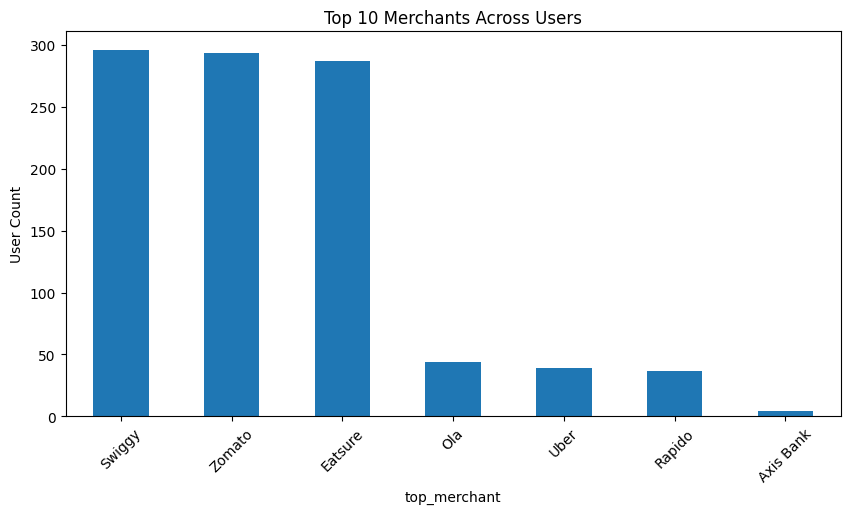

In [66]:
top_merchants = df['top_merchant'].value_counts().head(10)

plt.figure(figsize=(10, 5))
top_merchants.plot(kind='bar')
plt.title("Top 10 Merchants Across Users")
plt.ylabel("User Count")
plt.xticks(rotation=45)
plt.show()


In [67]:
df.columns

Index(['account_id', 'total_debit', 'total_credit', 'total_transactions',
       'food_spend', 'shopping_spend', 'transport_spend', 'rent_spend',
       'emi_spend', 'utility_spend', 'upi_txn', 'pos_txn', 'neft_txn',
       'top_merchant', 'savings_ratio', 'emi_ratio', 'food_ratio',
       'digital_ratio'],
      dtype='object')

In [68]:
PRODUCT_CATALOG = {
    "credit_cards": [
        "Cashback Credit Card",
        "Dining Rewards Credit Card",
        "Shopping Credit Card",
        "Travel Credit Card",
        "Fuel Credit Card",
        "Premium Lifestyle Credit Card",
        "Student / Entry-Level Credit Card",
        "Secured Credit Card"
    ],

    "loans": [
        "Personal Loan",
        "Pre-approved EMI Loan",
        "Education Loan",
        "Two-Wheeler Loan",
        "Used Car Loan",
        "Top-up Loan",
        "Instant Digital Loan"
    ],

    "offers": [
        "Dining Discount Offer",
        "Shopping Cashback Offer",
        "Fuel Surcharge Waiver",
        "UPI Transaction Cashback",
        "Utility Bill Cashback",
        "Festival Season Offer",
        "No-Cost EMI Offer",
        "Merchant Partner Discount"
    ],

    "banking_products": [
        "Savings Account Upgrade",
        "Salary Account",
        "Auto Debit Utility Setup",
        "Investment Starter Pack",
        "Insurance Cross-Sell"
    ]
}


In [69]:
def is_student_like(user):
    return (
        user['total_credit'] < 300000 and
        user['emi_spend'] == 0 and
        user['rent_spend'] == 0 and
        user['digital_ratio'] > 0.75 and
        user['total_transactions'] > 500
    )


In [70]:
def recommend_credit_cards(user):
    cards = []

    if user['shopping_spend'] > 200000:
        cards.append("Shopping Credit Card")

    if user['food_spend'] > 150000:
        cards.append("Dining Rewards Credit Card")

    if user['transport_spend'] > 80000:
        cards.append("Fuel Credit Card")

    if user['digital_ratio'] > 0.8:
        cards.append("Cashback Credit Card")

    if is_student_like(user):
        cards.append("Student / Entry-Level Credit Card")

    if user['total_credit'] < 200000:
        cards.append("Secured Credit Card")

    if user['savings_ratio'] > 1.5 and user['emi_ratio'] < 0.1:
        cards.append("Premium Lifestyle Credit Card")

    return list(set(cards))


In [71]:
def recommend_loans(user):
    loans = []

    if user['emi_spend'] == 0 and user['total_credit'] > 400000:
        loans.append("Pre-approved EMI Loan")

    if user['emi_ratio'] < 0.15 and user['total_credit'] > 600000:
        loans.append("Personal Loan")

    if user['transport_spend'] > 70000:
        loans.append("Two-Wheeler Loan")

    if user['savings_ratio'] < 1:
        loans.append("Instant Digital Loan")

    if user['emi_spend'] > 300000:
        loans.append("Top-up Loan")

    return list(set(loans))


In [72]:
def recommend_offers(user):
    offers = []

    if user['food_ratio'] > 0.05:
        offers.append("Dining Discount Offer")

    if user['shopping_spend'] > 150000:
        offers.append("Shopping Cashback Offer")

    if user['transport_spend'] > 50000:
        offers.append("Fuel Surcharge Waiver")

    if user['upi_txn'] > user['pos_txn']:
        offers.append("UPI Transaction Cashback")

    if user['utility_spend'] > 50000:
        offers.append("Utility Bill Cashback")

    offers.append("Festival Season Offer")

    return list(set(offers))


In [73]:
def recommend_banking_products(user):
    products = []

    if user['savings_ratio'] > 1.5:
        products.append("Investment Starter Pack")

    if user['total_credit'] > 800000:
        products.append("Salary Account")

    if user['utility_spend'] > 40000:
        products.append("Auto Debit Utility Setup")

    if user['emi_ratio'] > 0.2:
        products.append("Insurance Cross-Sell")

    products.append("Savings Account Upgrade")

    return list(set(products))


In [74]:
def generate_recommendations(user_features):
    recommendations = []

    for _, user in user_features.iterrows():
        rec = {
            "account_id": user['account_id'],
            "credit_cards": recommend_credit_cards(user),
            "loans": recommend_loans(user),
            "offers": recommend_offers(user),
            "banking_products": recommend_banking_products(user)
        }
        recommendations.append(rec)

    return pd.DataFrame(recommendations)


In [75]:
recommendation_df = generate_recommendations(df)

recommendation_df.head()


,account_id,credit_cards,loans,offers,banking_products
0,0001_Thiyagarajan_Subbu_Statement,"[Shopping Credit Card, Dining Rewards Credit C...","[Instant Digital Loan, Pre-approved EMI Loan, ...","[Utility Bill Cashback, UPI Transaction Cashba...","[Auto Debit Utility Setup, Salary Account, Sav..."
1,0002_Aarti_Selvam_Statement,[Shopping Credit Card],"[Instant Digital Loan, Pre-approved EMI Loan, ...","[Dining Discount Offer, Festival Season Offer,...","[Salary Account, Savings Account Upgrade]"
2,0003_Radha_Krishnan_Statement,[Shopping Credit Card],"[Instant Digital Loan, Personal Loan]","[Festival Season Offer, UPI Transaction Cashba...","[Auto Debit Utility Setup, Salary Account, Sav..."
3,0004_Loganathan_Surya_Statement,[],"[Pre-approved EMI Loan, Personal Loan]","[Utility Bill Cashback, UPI Transaction Cashba...","[Auto Debit Utility Setup, Salary Account, Sav..."
4,0005_Meena_Balaji_Statement,"[Shopping Credit Card, Dining Rewards Credit C...","[Instant Digital Loan, Personal Loan]","[UPI Transaction Cashback, Festival Season Off...","[Auto Debit Utility Setup, Salary Account, Sav..."


Purpose

Ensures confidence scores always stay within a valid probability range [0, 1].

Why needed

 - Feature-based scoring can exceed 1 or go negative
 - Confidence values must be interpretable and safe

How it works

 - Caps values above max_val to 1.0

 - Lifts values below min_val to 0.0

Used in

 - Credit card confidence

 - Loan confidence

 - Offer confidence

 - Banking product confidence

In [91]:
def clamp(score, min_val=0.0, max_val=1.0):
    return max(min(score, max_val), min_val)


Purpose

 - Generates rule-based product recommendations using engineered features.

Why rule-based?

 - No labeled target

 - Explainable

 - Banking-friendly logic

 Output Structure
 {
  "credit_cards": [],
  "loans": [],
  "offers": [],
  "banking_products": []
}

Example Rules

 - High shopping spend → Shopping Credit Card

 - Low EMI ratio → Pre-approved EMI Loan

 - High UPI usage → UPI Cashback Offer

In [92]:
def recommend_products(row):
    recommendations = {
        "credit_cards": [],
        "loans": [],
        "offers": [],
        "banking_products": []
    }

    # -------- CREDIT CARDS --------
    if row['shopping_spend'] > 0.2 * row['total_debit']:
        recommendations['credit_cards'].append("Shopping Credit Card")

    if row['food_ratio'] > 0.05:
        recommendations['credit_cards'].append("Dining Rewards Credit Card")

    if row['transport_spend'] > 0.1 * row['total_debit']:
        recommendations['credit_cards'].append("Fuel Credit Card")

    # -------- LOANS --------
    if row['emi_ratio'] < 0.2 and row['total_credit'] > 1_000_000:
        recommendations['loans'].append("Pre-approved EMI Loan")

    if row['emi_spend'] == 0 and row['total_credit'] > 500_000:
        recommendations['loans'].append("Personal Loan")

    # -------- OFFERS --------
    if row['upi_txn'] > 300:
        recommendations['offers'].append("UPI Transaction Cashback")

    if row['shopping_spend'] > 100_000:
        recommendations['offers'].append("Shopping Cashback Offer")

    if row['utility_spend'] > 50_000:
        recommendations['offers'].append("Utility Bill Cashback")

    # -------- BANKING PRODUCTS --------
    if row['savings_ratio'] > 1.2:
        recommendations['banking_products'].append("Investment Starter Pack")

    if row['digital_ratio'] > 0.8:
        recommendations['banking_products'].append("Auto Debit Utility Setup")

    return recommendations


Purpose

Calculates how suitable a credit card is for a user based on spending behavior.

Inputs

 - row: user’s engineered transaction features

 - card_type: type of credit card recommended

 Logic
 | Card Type            | Features Used                     |
| -------------------- | --------------------------------- |
| Shopping Credit Card | `shopping_spend`, `digital_ratio` |
| Dining Rewards Card  | `food_ratio`, `digital_ratio`     |
| Fuel Card            | `transport_spend`                 |
| Travel Card          | `total_transactions`              |

Output

 - Normalized confidence score between 0 and 1

Business Meaning

Higher confidence = card aligns strongly with user’s spending habits.

In [93]:
def credit_card_confidence(row, card):
    score = 0.0

    if card == "Shopping Credit Card":
        score += row['shopping_spend'] / (row['total_debit'] + 1)
        score += row['digital_ratio']

    elif card == "Dining Rewards Credit Card":
        score += row['food_ratio']
        score += row['digital_ratio']

    elif card == "Fuel Credit Card":
        score += row['transport_spend'] / (row['total_debit'] + 1)

    return clamp(score / 2)


Purpose

 - Calculates how suitable a loan product is for a user based on income and EMI burden.

🔹 Case 1: Pre-approved EMI Loan
    if loan == "Pre-approved EMI Loan":
        score += row['savings_ratio']
        score += (1 - row['emi_ratio'])

Why these features?
| Feature         | Meaning                              |
| --------------- | ------------------------------------ |
| `savings_ratio` | Higher savings → financially stable  |
| `1 - emi_ratio` | Lower EMI burden → room for new loan |

✅ Pre-approved loans are offered only to low-risk customers

✅ This logic mimics bank eligibility checks

🔹 Case 2: Personal Loan
Why this works:
| Feature        | Meaning                |
| -------------- | ---------------------- |
| `total_credit` | Income capacity        |
| `emi_ratio`    | Existing loan pressure |

 - High income + low EMI → strong personal loan candidate

 Business Interpretation
 “This confidence score approximates how likely the customer will qualify and accept the loan.”

In [94]:
def loan_confidence(row, loan):
    score = 0.0

    if loan == "Pre-approved EMI Loan":
        score += row['savings_ratio']
        score += (1 - row['emi_ratio'])

    elif loan == "Personal Loan":
        score += row['total_credit'] / 10_000_000
        score += (1 - row['emi_ratio'])

    return clamp(score / 2)


Purpose

 - Measures how relevant promotional offers are for the user.

 Logic
 | Offer Type        | Trigger Feature       |
| ----------------- | --------------------- |
| UPI Cashback      | High `upi_txn`        |
| Shopping Cashback | High `shopping_spend` |
| Utility Cashback  | High `utility_spend`  |

Output

 - Confidence score (0–1)

Business Meaning

Higher score = higher likelihood of user using the offer.

In [95]:
def offer_confidence(row, offer):
    score = 0.0

    if offer == "UPI Transaction Cashback":
        score += row['upi_txn'] / (row['total_transactions'] + 1)

    elif offer == "Shopping Cashback Offer":
        score += row['shopping_spend'] / (row['total_debit'] + 1)

    elif offer == "Utility Bill Cashback":
        score += row['utility_spend'] / (row['total_debit'] + 1)

    return clamp(score)


Purpose

 - Measures suitability for non-credit banking products (cross-sell).

 🔹 Case 1: Investment Starter Pack
    if product == "Investment Starter Pack":
        score += row['savings_ratio'] / 2
        score += row['total_credit'] / 5_000_000

Why these features?
| Feature         | Meaning           |
| --------------- | ----------------- |
| `savings_ratio` | Disposable income |
| `total_credit`  | Ability to invest |

Dividing savings_ratio by 2 avoids over-weighting

🔹 Case 2: Auto Debit Utility Setup
    elif product == "Auto Debit Utility Setup":
        score += row['digital_ratio']
        score += row['utility_spend'] / (row['total_debit'] + 1)

Why this logic?
| Feature         | Meaning                 |
| --------------- | ----------------------- |
| `digital_ratio` | Digital adoption        |
| `utility_spend` | Recurring bill behavior |


Ideal for customers who:

 - Use UPI/cards frequently

 - Pay regular utility

In [96]:
def banking_confidence(row, product):
    score = 0.0

    if product == "Investment Starter Pack":
        score += row['savings_ratio'] / 2
        score += row['total_credit'] / 5_000_000

    elif product == "Auto Debit Utility Setup":
        score += row['digital_ratio']
        score += row['utility_spend'] / (row['total_debit'] + 1)

    return clamp(score / 2)


Purpose

 - Adds confidence scores to each recommended product.

Input

 - Output from recommend_products()

 - User feature row

Output Example
 {
  "credit_cards": [
    {"product": "Shopping Credit Card", "confidence": 0.82}
  ],
  "loans": [
    {"product": "Personal Loan", "confidence": 0.65}
  ]
}


Why this is important

 - Makes recommendations rankable

 - Improves user trust

 - Enables top-N filtering

In [97]:
def attach_confidence(row):
    recs = row['recommendations']

    return {
        "credit_cards": [
            {
                "product": card,
                "confidence": round(credit_card_confidence(row, card), 2)
            }
            for card in recs.get('credit_cards', [])
        ],
        "loans": [
            {
                "product": loan,
                "confidence": round(loan_confidence(row, loan), 2)
            }
            for loan in recs.get('loans', [])
        ],
        "offers": [
            {
                "product": offer,
                "confidence": round(offer_confidence(row, offer), 2)
            }
            for offer in recs.get('offers', [])
        ],
        "banking_products": [
            {
                "product": product,
                "confidence": round(banking_confidence(row, product), 2)
            }
            for product in recs.get('banking_products', [])
        ]
    }


In [98]:
final_output = df.copy()

# Generate recommendations
final_output['recommendations'] = final_output.apply(
    recommend_products,
    axis=1
)

# Add confidence scores
final_output['recommendations'] = final_output.apply(
    attach_confidence,
    axis=1
)


In [99]:
final_output[['account_id', 'recommendations']].head()


,account_id,recommendations
0,0001_Thiyagarajan_Subbu_Statement,{'credit_cards': [{'product': 'Shopping Credit...
1,0002_Aarti_Selvam_Statement,{'credit_cards': [{'product': 'Shopping Credit...
2,0003_Radha_Krishnan_Statement,{'credit_cards': [{'product': 'Shopping Credit...
3,0004_Loganathan_Surya_Statement,"{'credit_cards': [], 'loans': [{'product': 'Pr..."
4,0005_Meena_Balaji_Statement,{'credit_cards': [{'product': 'Shopping Credit...
